# Data Analysis - Viaggiare attraverso il Metaverso 🌍

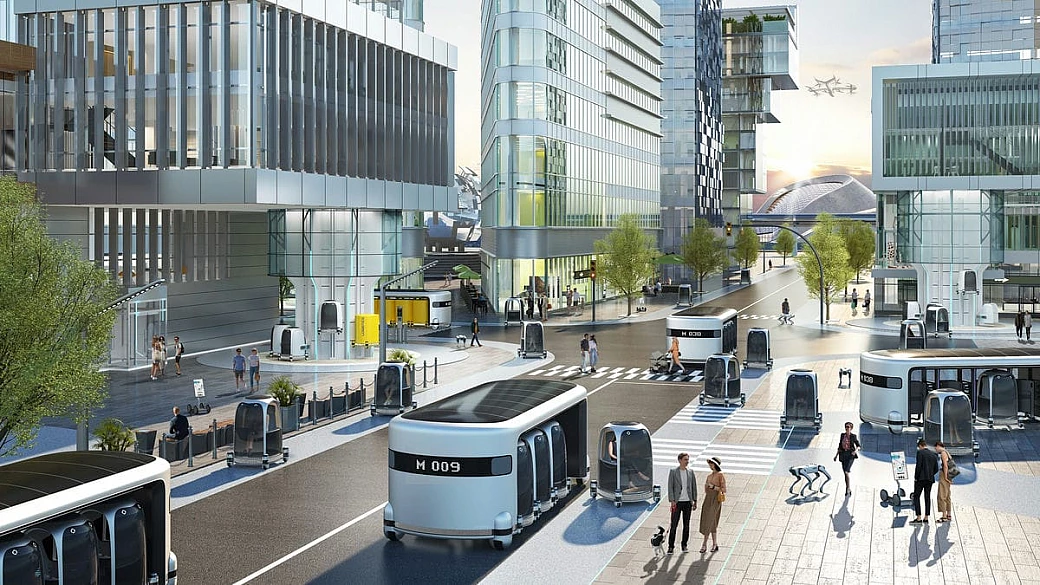

L’agenzia di viaggi META TOUR è la prima agenzia di viaggi che progetta esperienze nel metaverso immersive in tutto il mondo. Offre l’opportunità di effettuare tour virtuali di hotel, musei, destinazioni e mete turistiche più immersive già da casa. Chiunque potrà realizzare viaggi esotici o lunghe avventure in maniera totale e coinvolgente.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
raw_dataset = pd.read_csv('/content/drive/MyDrive/Travel_data Final Project.csv', encoding='windows-1254')

# Esplorazione del dataset

Partiamo effettuando un'analisi esplorativa dei dati (EDA) per ottenere una panoramica del comportamento degli utenti e individuare eventuali gruppi (cluster) di utenti. L'analisi includerà:

- Caricamento e pulizia dei dati
- Statistiche descrittive (distribuzioni, valori mancanti, outlier)
- Analisi delle preferenze di viaggio (destinazioni più scelte, durata media, stagionalità)
- Segmentazione utenti con clustering (per individuare gruppi con interessi simili)
- Visualizzazioni grafiche per interpretare meglio i dati

Il dataset contiene le seguenti colonne principali:

In [4]:
raw_dataset.head(100)

,visit_date,user_uuid,category,country_id,language,pacchetto_id,country,subscription_date,platform,hotel_id,stars
0,24-12-2022,118,luxury&relax,119,en,2,uk,27-4-2021,pc,611918,3
1,5-6-2022,136,spa,105,en,0,uk,7-5-2021,pc,310572,1
2,22-4-2022,176,luxury&relax,100,en,0,uk,7-1-2021,pc,610021,4
3,21-9-2022,138,spa,104,fr,3,fr,6-4-2020,tv,310461,4
4,26-8-2023,87,culture,115,en,2,uk,12-9-2021,tv,411556,4
...,...,...,...,...,...,...,...,...,...,...,...
95,2-4-2022,147,luxury&relax,106,it,3,it,21-2-2021,tv,610686,5
96,7-9-2022,27,luxury&relax,104,fr,2,fr,12-1-2021,tv,610494,4
97,3-4-2022,189,spa,107,en,1,uk,5-6-2021,pc,310763,3
98,16-12-2022,165,luxury&relax,116,en,0,uk,3-8-2020,pc,611650,1


I metadati principali delle colonne del dataset sono:

In [5]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   visit_date         999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   country_id         999 non-null    int64 
 4   language           999 non-null    object
 5   pacchetto_id       999 non-null    int64 
 6   country            999 non-null    object
 7   subscription_date  999 non-null    object
 8   platform           999 non-null    object
 9   hotel_id           999 non-null    int64 
 10  stars              999 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


Alcune colonne risultano poco utili ai fini dell'analisi per la predizione e quindi vanno eliminate.

In [6]:
cleaned_dataset = raw_dataset.drop(columns=['visit_date', 'user_uuid', 'country_id', 'pacchetto_id', 'subscription_date', 'hotel_id'])

E' necessario utilizzare le tecniche per effettuarne l'enconding delle variabili che non sono numeriche e che quindi non possono essere direttamente usate dagli algoritmi.

In [7]:
non_numerical_columns = cleaned_dataset.select_dtypes(exclude=['number']).columns
print(non_numerical_columns)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(cleaned_dataset[non_numerical_columns])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(non_numerical_columns))

final_df = cleaned_dataset.drop(columns=non_numerical_columns).join(encoded_df)

final_df.info()

Index(['category', 'language', 'country', 'platform'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   stars                     999 non-null    int64  
 1   category_culture          999 non-null    float64
 2   category_luxury&relax     999 non-null    float64
 3   category_spa              999 non-null    float64
 4   category_sport&adventure  999 non-null    float64
 5   language_en               999 non-null    float64
 6   language_fr               999 non-null    float64
 7   language_it               999 non-null    float64
 8   country_fr                999 non-null    float64
 9   country_it                999 non-null    float64
 10  country_uk                999 non-null    float64
 11  platform_mobile           999 non-null    float64
 12  platform_pc               999 non-null    float64

In [8]:
print(final_df.head())

   stars  category_culture  category_luxury&relax  category_spa  \
0      3               0.0                    1.0           0.0   
1      1               0.0                    0.0           1.0   
2      4               0.0                    1.0           0.0   
3      4               0.0                    0.0           1.0   
4      4               1.0                    0.0           0.0   

   category_sport&adventure  language_en  language_fr  language_it  \
0                       0.0          1.0          0.0          0.0   
1                       0.0          1.0          0.0          0.0   
2                       0.0          1.0          0.0          0.0   
3                       0.0          0.0          1.0          0.0   
4                       0.0          1.0          0.0          0.0   

   country_fr  country_it  country_uk  platform_mobile  platform_pc  \
0         0.0         0.0         1.0              0.0          1.0   
1         0.0         0.0         

**Analisi categorie di viaggio**

La categoria di viaggio più scelta è l'opzione "luxury&relax" seguita da "sport", "spa" e "culture".

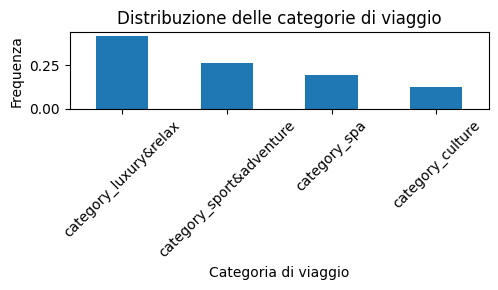

category_luxury&relax: 41.9%
category_sport&adventure: 26.2%
category_spa: 19.4%
category_culture: 12.4%


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Definisci le colonne delle categorie di viaggio
travel_categories = ['category_culture', 'category_luxury&relax', 'category_spa', 'category_sport&adventure']

# Calcola la frequenza di ogni categoria di viaggio
frequencies = final_df[travel_categories].sum() / len(final_df)

# Ordina le frequenze in ordine decrescente
frequencies = frequencies.sort_values(ascending=False)

# Crea un grafico a barre per visualizzare la distribuzione
frequencies.plot(kind='bar', figsize=(5, 3))
plt.title('Distribuzione delle categorie di viaggio')
plt.xlabel('Categoria di viaggio')
plt.ylabel('Frequenza')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stampa le frequenze ordinate in percentuale
for category, frequency in frequencies.items():
    print(f"{category}: {frequency * 100:.1f}%")

**Analisi distribuzione delle piattaforme**

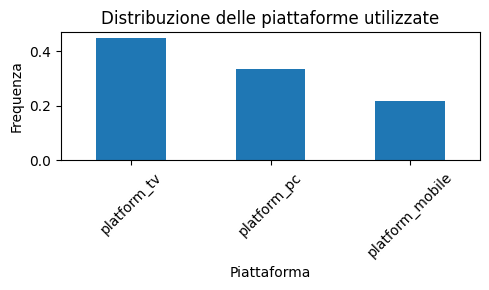

platform_tv: 44.7%
platform_pc: 33.4%
platform_mobile: 21.8%


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Definisci le colonne delle piattaforme
platforms = ['platform_mobile', 'platform_pc', 'platform_tv']

# Calcola la frequenza di ogni piattaforma
platform_frequencies = final_df[platforms].sum() / len(final_df)

# Ordina le frequenze in ordine decrescente
platform_frequencies = platform_frequencies.sort_values(ascending=False)

# Crea un grafico a barre per visualizzare la distribuzione
platform_frequencies.plot(kind='bar', figsize=(5, 3))
plt.title('Distribuzione delle piattaforme utilizzate')
plt.xlabel('Piattaforma')
plt.ylabel('Frequenza')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stampa le frequenze ordinate delle piattaforme in percentuale
for platform, frequency in platform_frequencies.items():
    print(f"{platform}: {frequency * 100:.1f}%")


Le piattaforme più utilizzate sono diverse, con PC e TV tra le più popolari.

**Destinazioni più scelte**

Dall'analisi emerge che:

- l'Italia è una destinazione di viaggio molto popolare.
- C'è una forte stagionalità nei viaggi, con picchi in alcuni mesi dell'anno (estate, vacanze invernali e pasquali).

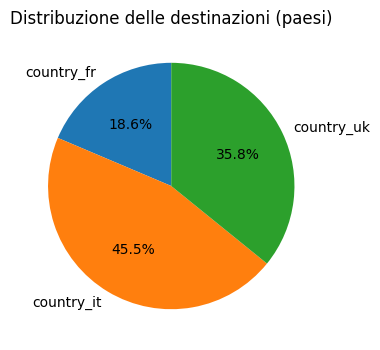

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Definisci le colonne delle destinazioni (paesi)
countries = ['country_fr', 'country_it', 'country_uk']

# Calcola la frequenza di ogni paese
country_frequencies = final_df[countries].sum() / len(final_df)

# Crea un diagramma a torta
plt.figure(figsize=(4, 4))  # Imposta la dimensione del grafico
plt.pie(country_frequencies, labels=country_frequencies.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuzione delle destinazioni (paesi)')
plt.show()

# K means clustering

Proviamo a segmentare i diversi gruppi di utenti in custers per capire meglio i loro comportamenti e interessi usando K-Means, un algoritmo comune per questo tipo di analisi.

Passaggi per il clustering:
- Importare le librerie necessarie
- Determinare il numero ottimale di cluster (usando il metodo "Elbow")
- Applicare K-Means per segmentare gli utenti
- Analizzare e visualizzare i cluster

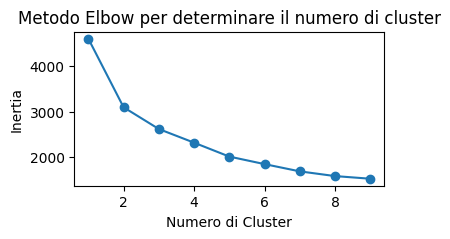

In [14]:
# Applicazione dell'algoritmo k means e valutazione
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Determinare il numero ottimale di cluster con il metodo Elbow
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(final_df)
    inertia.append(kmeans.inertia_)

# Grafico Elbow
plt.figure(figsize=(4, 2))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Numero di Cluster')
plt.ylabel('Inertia')
plt.title('Metodo Elbow per determinare il numero di cluster')
plt.show()


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Definiamo i valori di k da testare
k_values = [3, 4]

# Creiamo un dizionario per salvare i risultati
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(final_df)

    # Calcoliamo il Silhouette Score
    score = silhouette_score(final_df, cluster_labels)
    silhouette_scores[k] = score
    print(f"Silhouette Score per {k} cluster: {score:.4f}")

# Confrontiamo i risultati
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\n➡️ Il miglior numero di cluster è: {best_k} con un Silhouette Score di {silhouette_scores[best_k]:.4f}")


Silhouette Score per 3 cluster: 0.2430
Silhouette Score per 4 cluster: 0.2240

➡️ Il miglior numero di cluster è: 3 con un Silhouette Score di 0.2430


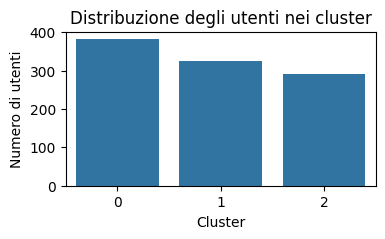

In [18]:
# Scegliamo un numero ottimale di cluster (3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
final_df['cluster'] = kmeans.fit_predict(final_df)

# Visualizzare la distribuzione degli utenti nei cluster
plt.figure(figsize=(4, 2))
sns.countplot(x=final_df['cluster'])
plt.title('Distribuzione degli utenti nei cluster')
plt.xlabel('Cluster')
plt.ylabel('Numero di utenti')
plt.show()


Il grafico mostra la distribuzione degli utenti nei cluster. Vediamo che:

- Il Cluster 0 ha il numero maggiore di utenti.
- Gli altri due cluster (1 e 2) hanno una distribuzione intermedia.

Ora possiamo analizzare le caratteristiche di ciascun cluster per capire come si differenziano gli utenti.

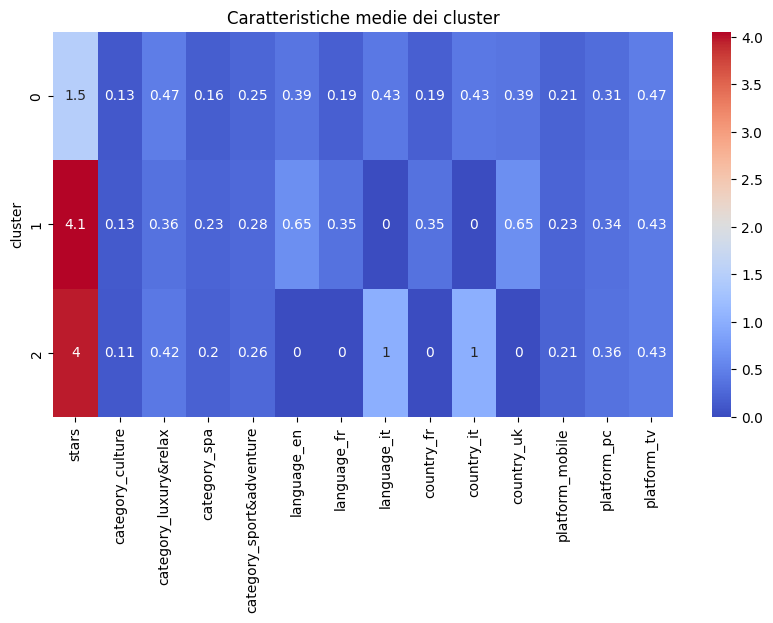

In [22]:
# Analizzare le caratteristiche medie di ogni cluster
cluster_summary = final_df.groupby('cluster').mean()

# Visualizzare le differenze tra i cluster con una heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm")
plt.title("Caratteristiche medie dei cluster")
plt.show()


# Interpretazione dei Cluster

La heatmap mostra le caratteristiche medie di ciascun cluster, permettendoci di identificare i comportamenti dei gruppi di utenti.

 **Cluster 0 (Primo gruppo di utenti)**

- Stelle medie degli hotel: 1.5 → Preferiscono alloggi economici o di fascia media.
- Categoria → Apprezzano esperienze rilassanti e di lusso
- Lingua → La maggior parte sono anglofoni e italiani.
- Dispositivi → Molto attivi su TV e PC.


**Cluster 1 (Secondo gruppo di utenti)**
- Stelle medie degli hotel: 4.1 → Scelgono hotel di alta categoria.
- Categoria → Bilanciano lusso e avventura.
- Lingua → Molti parlano francese e provengono dal Regno Unito.
- Dispositivi → Utilizzano tutti i dispositivi in modo equilibrato.


**Cluster 2 (Terzo gruppo di utenti)**
- Stelle medie degli hotel: 4 → Viaggiano in strutture di qualità alta.
- Categoria Luxury/Relax: → Hanno un forte interesse per esperienze di lusso.
- Lingua → Sono tutti italiani.
- Dispositivi → Preferiscono guardare su TV rispetto agli altri dispositivi.


# Conclusioni & prossimi passi per la strategia marketing 2025

🏡  Cluster 0: MetaClassics → Questi utenti amano viaggi rilassanti e confortevoli, come soggiorni in resort o spa, ma senza spendere cifre esorbitanti. Potrebbero essere famiglie, coppie o turisti occasionali in cerca di relax piuttosto che avventure →
Promuovere soggiorni brevi e convenienti equilibrati tra comfort e lusso leggero in località esclusive

🌍 Cluster 1: Globetrotters → Si tratta di viaggiatori sofisticati, con un budget più elevato, disposti a investire in esperienze di qualità. Hanno una varietà di interessi, quindi cercano sia avventura che relax. Offrire pacchetti avventura (es. escursioni, sport estremi). Promuovere esperienze immersive attraverso app e mobile.

✨ Cluster 2: Luxury Lovers → Viaggiatori più interessati a soggiorni confortevoli di lusso, prevalentemente italiani →  Offrire pacchetti VIP con esperienze esclusive. Creare programmi fedeltà o membership per incentivare viaggi frequenti.